In [15]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [16]:
df = pd.read_csv("./data.csv")
df.columns = df.columns.str.strip()
df.shape

(1783356, 79)

In [23]:
X = df.drop(columns=['Label'])
y = df["Label"]
print(X.shape)
print(y.shape)

(1782497, 78)
(1782497,)


In [ ]:
# clean data
def clean_dataset(df):
    df.dropna(inplace=True)
    df.drop_duplicates()
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1) #pour supprimer les lignes avec + ou - l'infini
    return df[indices_to_keep].astype(np.float64)

In [29]:
X = clean_dataset(X)
y = y[X.index]
print(X.shape)
print(y.shape)

(1781545, 78)
(1781545,)


In [30]:
#SelectFromModel: A feature selection method that removes less important features based on a model's performance
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier())

In [31]:
sel.get_support()

array([ True, False,  True, False,  True,  True,  True, False,  True,
       False,  True, False,  True,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False,  True, False,  True,  True,  True,  True, False, False,
       False,  True, False, False, False, False, False,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False])

In [32]:
selected_features= X.columns[(sel.get_support())]
print(selected_features)
print(len(selected_features))

Index(['Destination Port', 'Total Fwd Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Mean', 'Bwd Packet Length Max',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Fwd IAT Std',
       'Fwd Header Length', 'Bwd Header Length', 'Bwd Packets/s',
       'Max Packet Length', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'PSH Flag Count', 'Average Packet Size',
       'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1',
       'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward'],
      dtype='object')
27


In [33]:
sel.estimator_.feature_importances_ # donner le score de chaque caractéristiques 

array([4.40439664e-02, 9.76940411e-03, 1.48363486e-02, 9.23196903e-03,
       3.87978950e-02, 2.35915609e-02, 2.72979787e-02, 2.87927665e-03,
       2.12147323e-02, 1.14284536e-02, 4.54574194e-02, 1.27249816e-02,
       3.47641855e-02, 2.90627609e-02, 1.18623473e-02, 8.37386372e-03,
       1.11866890e-02, 1.04394191e-02, 1.10766773e-02, 5.68183360e-03,
       8.90598443e-03, 5.75858032e-03, 1.74947494e-02, 9.75039853e-03,
       8.04508574e-03, 4.18195731e-03, 2.85243453e-03, 1.68582987e-03,
       2.17309591e-03, 2.74687984e-03, 4.67689547e-04, 0.00000000e+00,
       1.49080365e-05, 0.00000000e+00, 1.88210429e-02, 1.75356236e-02,
       1.04822369e-02, 2.05135462e-02, 5.07861409e-03, 2.54964865e-02,
       2.47780257e-02, 6.25144431e-02, 4.79563208e-02, 1.44121530e-03,
       5.92755498e-04, 8.79781483e-08, 1.62333413e-02, 7.18345707e-03,
       1.36879879e-03, 2.10985197e-05, 6.91264684e-07, 1.22704627e-03,
       4.46485807e-02, 1.86034137e-02, 4.62259156e-02, 1.59546169e-02,
      

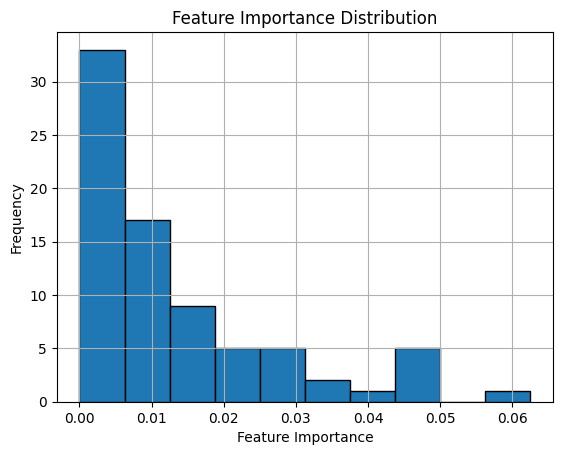

In [34]:
# Histogram of Feature Importances
pd.Series(sel.estimator_.feature_importances_).hist(bins=10, edgecolor='black')
plt.title('Feature Importance Distribution')
plt.xlabel('Feature Importance')
plt.ylabel('Frequency')
plt.show()